In [33]:
import pandas as pd
import numpy as np
import plotly as py
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv")
df

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66141,Zimbabwe,ZWE,2021-12-01,6640440.0,3809900.0,2830540.0,NaN,28498.0,21938.0,44.00,25.24,18.76,NaN,1454.0,12896.0,0.085
66142,Zimbabwe,ZWE,2021-12-02,6682111.0,3830488.0,2851623.0,NaN,41671.0,24152.0,44.28,25.38,18.89,NaN,1600.0,13167.0,0.087
66143,Zimbabwe,ZWE,2021-12-03,6710095.0,3845246.0,2864849.0,NaN,27984.0,23681.0,44.46,25.48,18.98,NaN,1569.0,12556.0,0.083
66144,Zimbabwe,ZWE,2021-12-04,6742193.0,3866139.0,2876054.0,NaN,32098.0,25964.0,44.67,25.62,19.06,NaN,1720.0,14392.0,0.095


In [7]:
df.isnull().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     28657
people_vaccinated                      30282
people_fully_vaccinated                33240
total_boosters                         57088
daily_vaccinations_raw                 34713
daily_vaccinations                       344
total_vaccinations_per_hundred         28657
people_vaccinated_per_hundred          30282
people_fully_vaccinated_per_hundred    33240
total_boosters_per_hundred             57088
daily_vaccinations_per_million           344
daily_people_vaccinated                 1590
daily_people_vaccinated_per_hundred     1590
dtype: int64

In [8]:
df.fillna(value=0, inplace=True)
date = df.date.str.split('-', expand=True)
date

,0,1,2
0,2021,02,22
1,2021,02,23
2,2021,02,24
3,2021,02,25
4,2021,02,26
...,...,...,...
66141,2021,12,01
66142,2021,12,02
66143,2021,12,03
66144,2021,12,04


In [9]:
df['year'] = date[0]
df['month'] = date[1]
df['day'] = date[2]
df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.day = pd.to_numeric(df.day)

df.date = pd.to_datetime(df.date)

df

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,year,month,day
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,2021,2,22
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,0.0,34.0,1367.0,0.003,2021,2,23
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,0.0,34.0,1367.0,0.003,2021,2,24
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,0.0,34.0,1367.0,0.003,2021,2,25
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,0.0,34.0,1367.0,0.003,2021,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66141,Zimbabwe,ZWE,2021-12-01,6640440.0,3809900.0,2830540.0,0.0,28498.0,21938.0,44.00,25.24,18.76,0.0,1454.0,12896.0,0.085,2021,12,1
66142,Zimbabwe,ZWE,2021-12-02,6682111.0,3830488.0,2851623.0,0.0,41671.0,24152.0,44.28,25.38,18.89,0.0,1600.0,13167.0,0.087,2021,12,2
66143,Zimbabwe,ZWE,2021-12-03,6710095.0,3845246.0,2864849.0,0.0,27984.0,23681.0,44.46,25.48,18.98,0.0,1569.0,12556.0,0.083,2021,12,3
66144,Zimbabwe,ZWE,2021-12-04,6742193.0,3866139.0,2876054.0,0.0,32098.0,25964.0,44.67,25.62,19.06,0.0,1720.0,14392.0,0.095,2021,12,4


In [10]:
numeric_col = df[['location','total_vaccinations','people_vaccinated', 'people_fully_vaccinated','total_boosters','daily_vaccinations_raw',
                 'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred'
                 ,'total_boosters_per_hundred', 'daily_vaccinations_per_million', 'daily_people_vaccinated', 
                 'daily_people_vaccinated_per_hundred']]
vac_mean = numeric_col.groupby('location').mean()
vac_sum = numeric_col.groupby('location').sum()
vac_mean.min()

total_vaccinations                     4.094118
people_vaccinated                      2.764706
people_fully_vaccinated                1.329412
total_boosters                         0.000000
daily_vaccinations_raw                 0.000000
daily_vaccinations                     0.505882
total_vaccinations_per_hundred         0.002273
people_vaccinated_per_hundred          0.000682
people_fully_vaccinated_per_hundred    0.000909
total_boosters_per_hundred             0.000000
daily_vaccinations_per_million         3.295455
daily_people_vaccinated                0.000000
daily_people_vaccinated_per_hundred    0.000000
dtype: float64

In [11]:
vac_mean.max()

total_vaccinations                     2.925522e+09
people_vaccinated                      1.617023e+09
people_fully_vaccinated                1.046719e+09
total_boosters                         2.673463e+07
daily_vaccinations_raw                 2.219036e+07
daily_vaccinations                     2.193703e+07
total_vaccinations_per_hundred         1.207166e+02
people_vaccinated_per_hundred          5.761191e+01
people_fully_vaccinated_per_hundred    4.904164e+01
total_boosters_per_hundred             1.167827e+01
daily_vaccinations_per_million         3.579126e+04
daily_people_vaccinated                1.165921e+07
daily_people_vaccinated_per_hundred    2.113744e+00
dtype: float64

In [12]:
vac_sum.min()

total_vaccinations                     348.00
people_vaccinated                      235.00
people_fully_vaccinated                113.00
total_boosters                           0.00
daily_vaccinations_raw                   0.00
daily_vaccinations                      43.00
total_vaccinations_per_hundred           0.10
people_vaccinated_per_hundred            0.03
people_fully_vaccinated_per_hundred      0.04
total_boosters_per_hundred               0.00
daily_vaccinations_per_million         145.00
daily_people_vaccinated                  0.00
daily_people_vaccinated_per_hundred      0.00
dtype: float64

In [13]:
vac_sum.max()

total_vaccinations                     1.082443e+12
people_vaccinated                      5.982986e+11
people_fully_vaccinated                3.872860e+11
total_boosters                         9.891812e+09
daily_vaccinations_raw                 8.210434e+09
daily_vaccinations                     8.116700e+09
total_vaccinations_per_hundred         4.022636e+04
people_vaccinated_per_hundred          1.927605e+04
people_fully_vaccinated_per_hundred    1.683936e+04
total_boosters_per_hundred             4.110750e+03
daily_vaccinations_per_million         3.007716e+06
daily_people_vaccinated                4.313907e+09
daily_people_vaccinated_per_hundred    1.291950e+02
dtype: float64

Global Daily vaccination

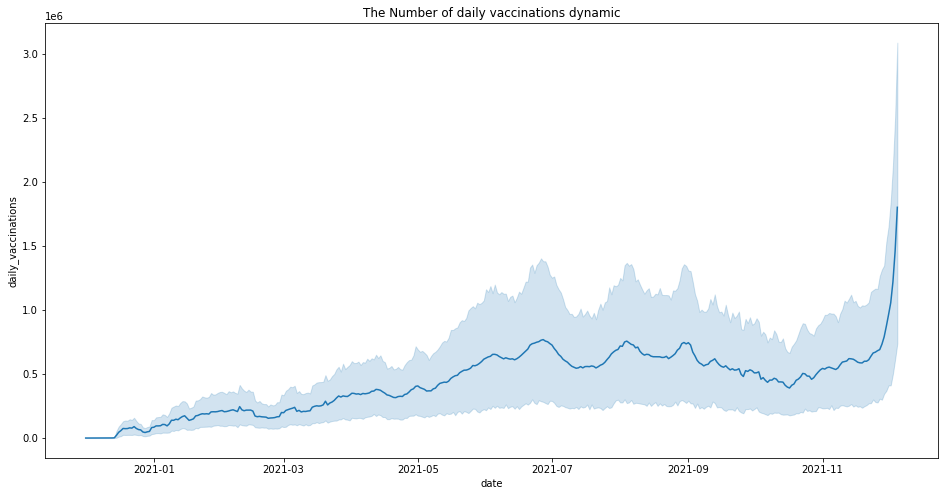

In [14]:
plt.figure(figsize=(16,8))
sns.lineplot(x=df.date, y=df.daily_vaccinations)
plt.title('The Number of daily vaccinations dynamic')
plt.show()

In [15]:
countries = df.groupby('location')['total_vaccinations'].max().sort_values(ascending= False)[:5].index

top_countries = pd.DataFrame(columns= df.columns)
for country in countries:
    top_countries = top_countries.append(df.loc[df['location'] == country])

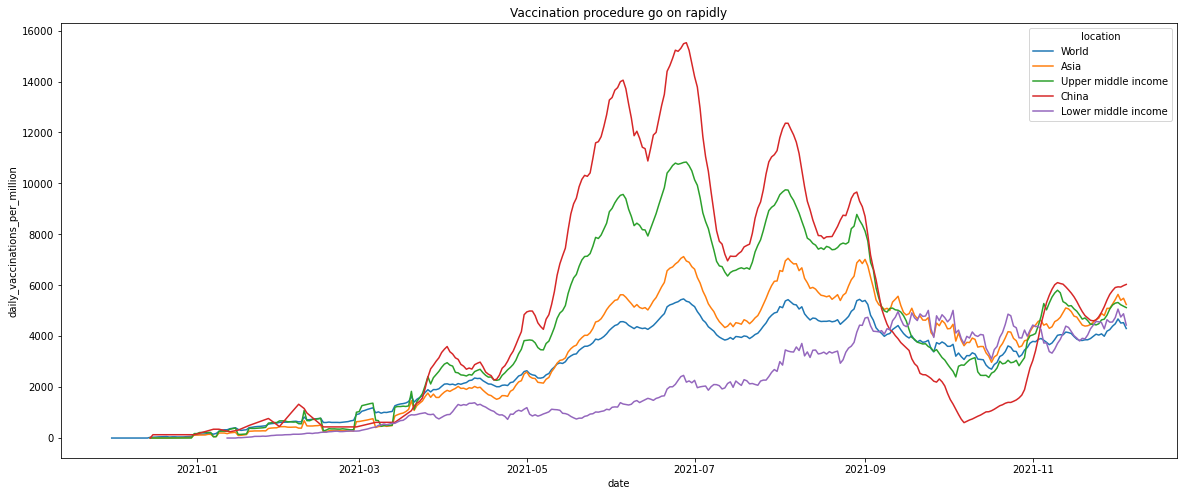

In [16]:
plt.figure(figsize=(20,8))
sns.lineplot(top_countries['date'], top_countries['daily_vaccinations_per_million'], hue= top_countries['location'], ci= False)
plt.title('Vaccination procedure go on rapidly');

In [18]:
# Daily Vaccination For each country
location = df.location.unique()

In [19]:
location

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethi

In [50]:
vaccination_subset = df.loc[((df.location == 'Zambia') & (df.people_fully_vaccinated != 0))]#["Zambia"]
vaccination_subset


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,year,month,day
65658,Zambia,ZMB,2021-05-21,129941.0,128834.0,1107.0,0.0,3650.0,4224.0,0.69,0.68,0.01,0.0,223.0,4066.0,0.021,2021,5,21
65659,Zambia,ZMB,2021-05-22,134832.0,131633.0,3199.0,0.0,4891.0,3863.0,0.71,0.70,0.02,0.0,204.0,3406.0,0.018,2021,5,22
65660,Zambia,ZMB,2021-05-23,138201.0,133134.0,5067.0,0.0,3369.0,3846.0,0.73,0.70,0.03,0.0,203.0,3122.0,0.017,2021,5,23
65662,Zambia,ZMB,2021-05-25,144085.0,138799.0,5286.0,0.0,0.0,3800.0,0.76,0.73,0.03,0.0,201.0,3044.0,0.016,2021,5,25
65663,Zambia,ZMB,2021-05-26,145198.0,139912.0,5286.0,0.0,1113.0,3570.0,0.77,0.74,0.03,0.0,189.0,2815.0,0.015,2021,5,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65845,Zambia,ZMB,2021-11-24,1057879.0,0.0,667433.0,0.0,22083.0,7383.0,5.59,0.00,3.53,0.0,390.0,0.0,0.000,2021,11,24
65848,Zambia,ZMB,2021-11-27,1062540.0,0.0,671006.0,0.0,0.0,5155.0,5.62,0.00,3.55,0.0,272.0,0.0,0.000,2021,11,27
65850,Zambia,ZMB,2021-11-29,1086607.0,0.0,691735.0,0.0,0.0,8102.0,5.74,0.00,3.66,0.0,428.0,0.0,0.000,2021,11,29
65853,Zambia,ZMB,2021-12-02,1109512.0,0.0,711422.0,0.0,0.0,7154.0,5.86,0.00,3.76,0.0,378.0,0.0,0.000,2021,12,2


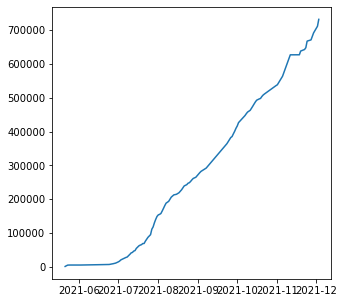

In [51]:
#def Daily_Vaccination_Plot():
vaccination_subset = vaccination_subset = df.loc[((df.location == 'Zambia') & (df.people_fully_vaccinated != 0))]
    
plt.subplots(figsize=(5,5))
plt.plot(vaccination_subset["date"],vaccination_subset["people_fully_vaccinated"])
    
    
    #ax.plot(vaccination_subset["date"],vaccination_subset["people_fully_vaccinated"])
    #ax.set_xlabel = ("Date")
    #ax.set_ylabel = ("people_fully_vaccinated")
    #ax.set_ylim(0,200)
    #ax.set_xlim(1990,2017)
    #ax.set_title("people_fully_vaccinated" + str(location) )
plt.show()


In [62]:
@ipywidgets.interact(location = df.location.unique())
def Daily_Vaccination_Plot(location):
    vaccination_subset = vaccination_subset = df.loc[((df.location == location) & (df.people_fully_vaccinated != 0))]
    
    fig,ax = plt.subplots(figsize=(10,5))
    
    ax.plot(vaccination_subset["date"],vaccination_subset["people_fully_vaccinated"])
    ax.set_xlabel = ("Date")
    ax.set_ylabel = ("people_fully_vaccinated")
    #ax.set_xlim(2021,2017)
    ax.set_title("people_fully_vaccinated" + str(location) )
    plt.show()

interactive(children=(Dropdown(description='location', options=('Afghanistan', 'Africa', 'Albania', 'Algeria',…

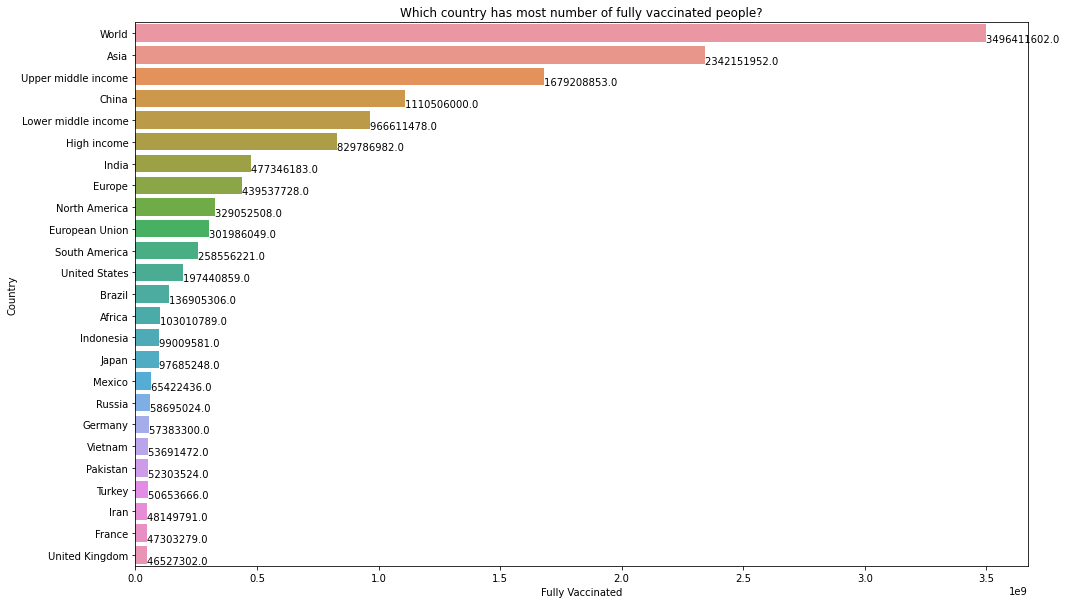

In [70]:
fully_vaccinated = df.groupby("location")["people_fully_vaccinated"].max().sort_values(ascending= False).head(25)

plt.figure(figsize=(16,10))
ax = sns.barplot(x=fully_vaccinated, y=fully_vaccinated.index)
plt.xlabel("Fully Vaccinated")
plt.ylabel("Country");
plt.title('Which country has most number of fully vaccinated people?');

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} '.format(width))

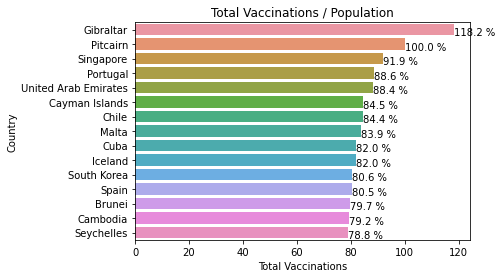

In [79]:
# the percentage of people who fully vaccinated in different country

population_country=df.groupby('location')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending=False).head(15)

ax = sns.barplot(x= population_country, y= population_country.index)
plt.title('Total Vaccinations / Population')
plt.xlabel('Total Vaccinations')
plt.ylabel('Country')

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} %'.format(width))